In [1]:
import zipfile
with zipfile.ZipFile('./dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./images')

In [2]:
!pip install tensorflow
!pip install keras


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import keras

In [4]:
PATH = './images/images/collectedimages'
CLASS_NAMES = ['hello', 'fine', 'no', 'thankyou', 'yes']
BATCH_SIZE = 32

In [27]:
dataset = tf.keras.utils.image_dataset_from_directory(
    PATH,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2, 
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 150 files belonging to 5 classes.
Using 120 files for training.


In [7]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    PATH,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2, 
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 150 files belonging to 5 classes.
Using 30 files for validation.


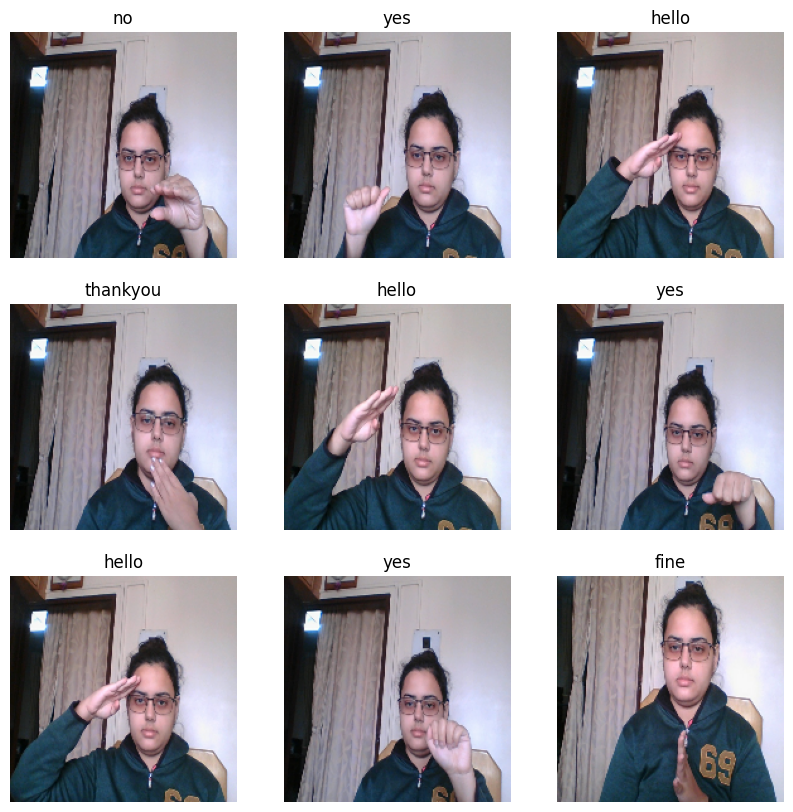

In [9]:
import matplotlib.pyplot as plt

class_names = ['hello', 'fine', 'no', 'thankyou', 'yes']
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [14]:
history = model.fit(
  dataset,
  batch_size=BATCH_SIZE,
  validation_data=validation_dataset,
  epochs=10
)

Epoch 1/10


4/4 [==============================] - 1s 255ms/step - loss: 0.2226 - accuracy: 0.9583 - val_loss: 0.2759 - val_accuracy: 0.9000
Epoch 2/10
4/4 [==============================] - 1s 284ms/step - loss: 0.1734 - accuracy: 0.9500 - val_loss: 0.1254 - val_accuracy: 0.9333
Epoch 3/10
4/4 [==============================] - 1s 230ms/step - loss: 0.1465 - accuracy: 0.9583 - val_loss: 0.0782 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 1s 221ms/step - loss: 0.1220 - accuracy: 0.9583 - val_loss: 0.0999 - val_accuracy: 0.9667
Epoch 5/10
4/4 [==============================] - 1s 230ms/step - loss: 0.0997 - accuracy: 0.9583 - val_loss: 0.0851 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 1s 219ms/step - loss: 0.0610 - accuracy: 0.9833 - val_loss: 0.0939 - val_accuracy: 0.9667
Epoch 7/10
4/4 [==============================] - 1s 209ms/step - loss: 0.0509 - accuracy: 0.9917 - val_loss: 0.0739 - val_accuracy: 1.0000
Epoch 8/10
4/4 [===============

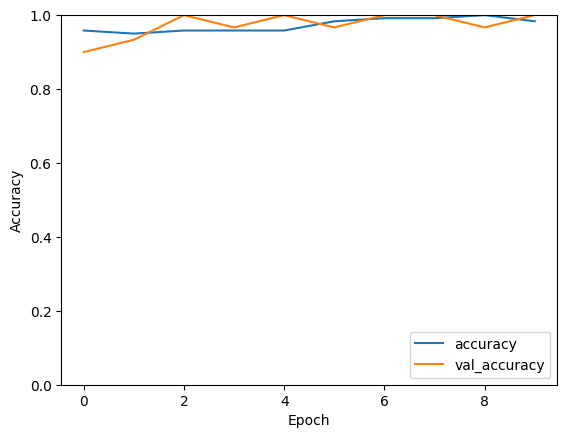

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Testing


In [16]:
import cv2

In [17]:
image_path = 'images/images/collectedimages/fine/fine.2c88c765-bb54-11ee-b389-2cdb079ec43c.jpg'

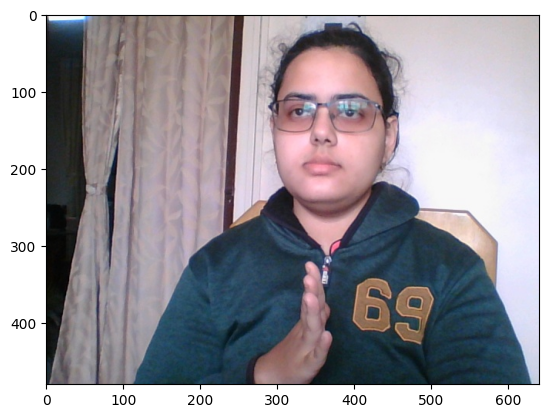

In [18]:
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

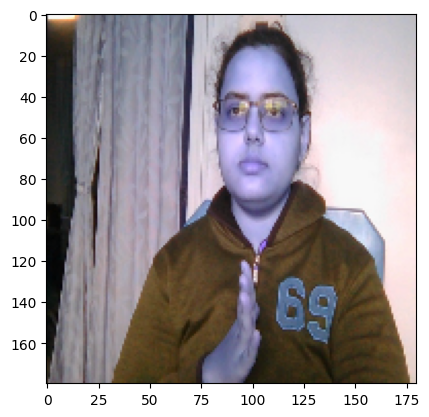

In [19]:
resize = tf.image.resize(img, (180,180))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [20]:
import numpy as np

In [21]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 389ms/step


In [22]:
yhat

array([[-0.7946554,  6.937089 , -0.8996094, -1.1948913, -0.8990202]],
      dtype=float32)

In [23]:
predictions = np.array(yhat)

# Find the index of the maximum value in the array
predicted_class_index = np.argmax(predictions)

# Output the predicted class index
print("Predicted class index:", predicted_class_index)


if predicted_class_index==0: 
    print(f'Predicted class is Hello')
elif predicted_class_index==1:
    print(f'Predicted class is Fine')
elif predicted_class_index==2:
    print(f'Predicted class is No')
elif predicted_class_index==3:
    print(f'Predicted class is Thank You')
elif predicted_class_index==4:
    print(f'Predicted class is Yes')

Predicted class index: 1
Predicted class is Fine


In [25]:
model.save('cnn_10ep_ac1.h5')

In [26]:
model.save('cnn_10ep_ac1.keras')

In [17]:
pip install tensorflowjs


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/15.2 MB 2.6 MB/s eta 0:00:06
      --------------------------------------- 0.3/15.2 MB 3.2 MB/s eta 0:00:05
     - -------------------------------------- 0.4/15.2 MB 3.0 MB/s eta 0:00:05
     - -------------------------------------- 0.6/15.2 MB 3.6 MB/s eta 0:00:05
     - -------------------------------------- 0.7/15.2 MB 3.4 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/15.2 MB 3.6 MB/s eta 0:00:05
     -- ------------------------------------- 1.1/15.2 MB 3.6 MB/s eta 0:00:04
     --- ------------------------------------ 1.3/15.2 MB 3.7 MB/s eta 0:00:04
     --- ------------------------------------ 1.5/15.2 MB 3.6 MB/s eta 0:00:04
     ---- ----------------------------------- 1.6/15.2 MB 3.5 MB/s eta 0:00:04
     ---- ----------------------------------- 1.8/15.2 MB 3.6 MB/s eta 0:00:04
     ----- ---------------------------------- 2.0/15.2 MB 